#### [PREV](4.OOP_Logistic_Regression.ipynb) | [HOME](../README.md) | [NEXT](6.OOP_Neural_Network_Adv.ipynb)


#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

#### Step 2: Import The Data

In [16]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Split The Data into Training And Testing Sets

In [17]:
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

X_insects = pd.get_dummies(insects[['continent', 'latitude', 'sex']], dummy_na=True, dtype='int')

y_insects = insects['wingsize']

X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.3, random_state=42)

#### Step 4: Visualise The Data

Text(0, 0.5, 'Wing Span')

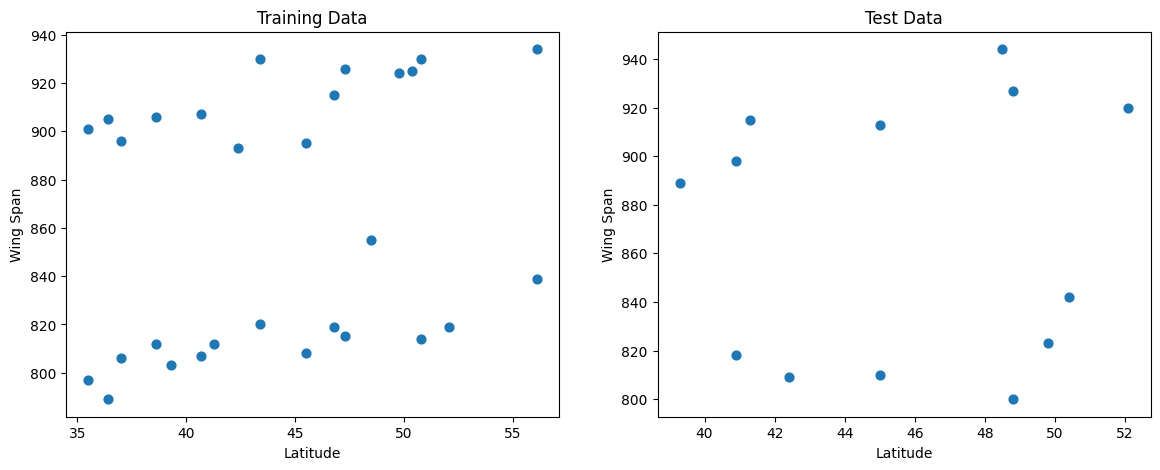

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [19]:
model = keras.Sequential([
    layers.Input(shape=(3,)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron (for regression)
])

In [20]:
model.compile(optimizer='adam', loss='MeanAbsoluteError')

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [21]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 838.8765 - val_loss: 853.0527
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 860.0533 - val_loss: 852.0339
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 840.2384 - val_loss: 850.9904
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 850.5652 - val_loss: 849.9147
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 838.4667 - val_loss: 848.8126
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 847.9896 - val_loss: 847.6678
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 832.8711 - val_loss: 846.4861
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 843.9949 - val_loss: 845.2836
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 835.9076 - val_loss: 844.0381
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 832.8094 - val_loss: 842.7486
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 824.3050 - val_loss: 841.4274
Epoch 12/200
15/15

#### Step 7: Evaluate The Model

In [22]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 80.0607
Test Loss: 80.0607


### Step 8: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [23]:
# Use the trained model to make predictions on new data
new_data = np.array([[1, 38, 0]])
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[716.58704]]


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


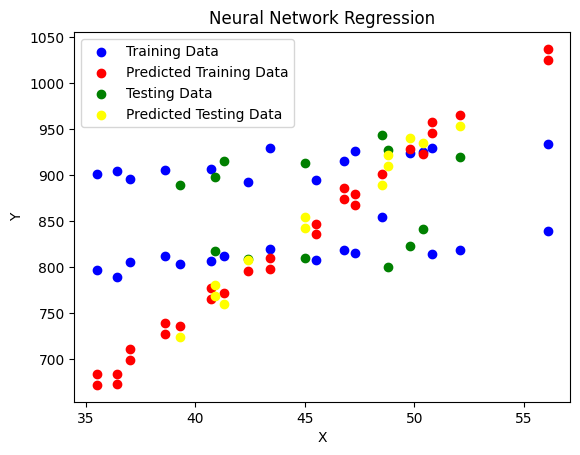

In [26]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_train[['latitude']], model.predict(X_train), label='Predicted Training Data', color='red')
plt.scatter(X_test[['latitude']], y_test, label='Testing Data', color='green')
plt.scatter(X_test[['latitude']], model.predict(X_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [25]:
predictions = model.predict(X_train).flatten()
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': y_train - predictions
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost:.5f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
    Target  Predicted result        Loss
9      924        928.230225   -4.230225
15     895        835.502991   59.497009
33     803        736.191162   66.808838
16     926        867.787598   58.212402
36     808        847.393555  -39.393555
35     820        809.728271   10.271729
0      901        671.747375  229.252625
24     807        776.904419   30.095581
5      893        795.504883   97.495117
11     905        672.286682  232.713318
40     819        965.770264 -146.770264
1      896        698.651184  197.348816
31     814        958.056702 -144.056702
21     797        683.637939  113.362061
2      906        727.348511  178.651489
32     789        684.177246  104.822754
41     839       1037.513794 -198.513794
3      907        765.013855  141.986145
37     815        879.678162  -64.678162
23     812        739.239075   72.760925
34     812        772.062927   39.937073
10     930        946.166138  -16.166138
22     806        7